LAB 02
05/09/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

E1. Read any image that you want using the right command and display it.

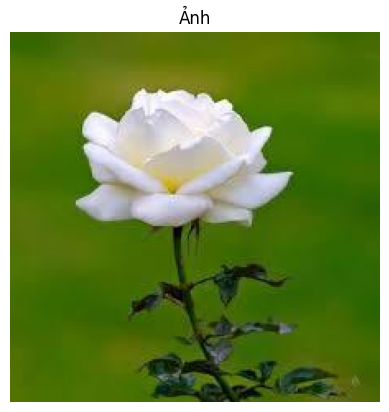

In [ ]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\whiteRose.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    plt.imshow(image)
    plt.title("Ảnh")
    plt.axis('off')

E2. Now mirror the image that you have read at center i.e. the lower half of the image should be the copyof the upper half.

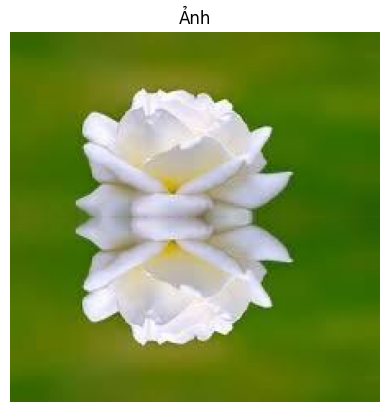

In [ ]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\whiteRose.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
  # Chuyển hình ảnh thành array
    image = np.array(image)
    # Lấy chiều cao và chiều rộng của ảnh
    (h, w) = image.shape[:2]
    # Tính toán tâm của ảnh
    center = h // 2
    for i in range(center, h):
        for j in range(w):
            image[i, j] = image[h - i - 1, j]  # Sao chép nửa trên xuống nửa dưới

    plt.imshow(image)
    plt.title("Ảnh")
    plt.axis('off')

E3. Create an r x c matrix of ones and pad 10 pixels wide border of zeros across each side of it, such that its order will become (4+500+4) x (4+500+4) = 508x508 as shown below:

(np.float64(-0.5), np.float64(507.5), np.float64(507.5), np.float64(-0.5))

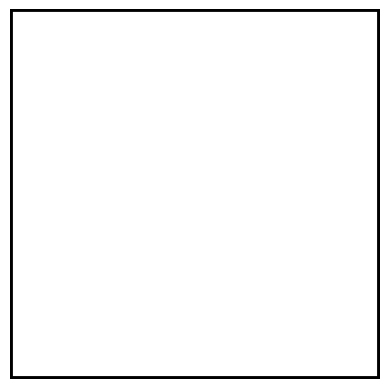

In [ ]:
# Tạo một ảnh với kích thước và màu trắng
image = np.full((500, 500, 3), 255, dtype=np.uint8)
# Tạo đường biên màu đen kích thước 4 pixel
image = cv2.copyMakeBorder(image, 4,4,4,4, cv2.BORDER_CONSTANT, None, 0)

plt.imshow(image)
plt.axis('off')

E4. Write 3 different Python functions that can create the images given below. Code them in such so that the size of the image itself and the boxes and lines can be changed.

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

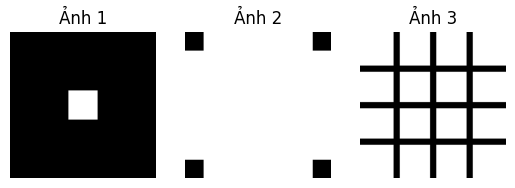

In [8]:
# Tạo một ảnh với kích thước và màu trắng
image1 = np.full((100, 100, 3), 255, dtype=np.uint8)
# Tạo đường biên màu đen kích thước 200 pixel
image1 = cv2.copyMakeBorder(image1, 200,200,200,200, cv2.BORDER_CONSTANT, None, 0)

# Tạo một ảnh với kích thước và màu trắng
image2 = np.full((400, 400, 3), 255, dtype=np.uint8)
# Tạo 4 chấm ở 4 góc
image2 = cv2.rectangle(image2, (0,0), (50,50), (0,0,0), -1)
image2 = cv2.rectangle(image2, (400,400), (350,350), (0,0,0), -1)
image2 = cv2.rectangle(image2, (0,400), (50,350), (0,0,0), -1)
image2 = cv2.rectangle(image2, (400,0), (350,50), (0,0,0), -1)


# Tạo một ảnh với kích thước và màu trắng
image3 = np.full((400, 400, 3), 255, dtype=np.uint8)
# Vẽ 4 đường dọc chia ô
spacing = 100  # Khoảng cách giữa các đường
for i in range(1, 4):
    image3 = cv2.line(image3, (spacing * i, 0), (spacing * i, 400), (0, 0, 0), 15)

# Vẽ 4 đường ngang chia ô
for i in range(1, 4):
    image3 = cv2.line(image3, (0, spacing * i), (400, spacing * i), (0, 0, 0), 15)


plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Ảnh 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title("Ảnh 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image3)
plt.title("Ảnh 3")
plt.axis('off')

E5. Read an image and resize it to 512x512 using the appropriate function. Then down sample the image by 4 so that the final size of the image is 128x128.

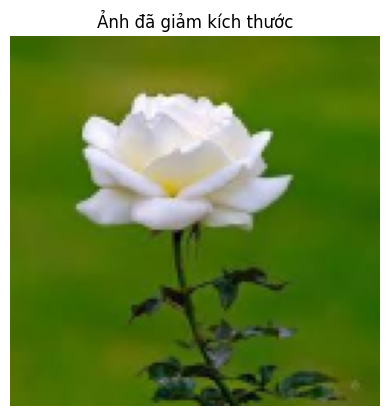

In [ ]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\whiteRose.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    # Thay đổi kích thước ảnh thành 512x512
    resized_image = cv2.resize(image, (512, 512))
    # Giảm kích thước ảnh xuống 4 lần (128x128)
    downsampled_image = cv2.resize(resized_image, (128, 128))

# Hiển thị ảnh
plt.imshow(downsampled_image)
plt.title('Ảnh đã giảm kích thước')
plt.axis('off')
plt.show()

E6.  
Write a function to create a white image of 500x500 (or any other size entered by the user) and then create 4 boxes of Red, Green, Blue and Black respectively on each corner of the image as shown below. 
The size of the colored boxes should be 1/8th the size of the image. (HINT: the arrays of ones and zeros can be in more than 2 dimensions)   

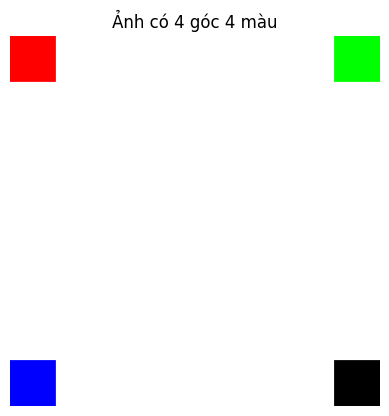

In [11]:
def create_image_with_boxes(image_size=500):
    # Tạo ảnh trắng với kích thước do người dùng nhập (mặc định là 500x500)
    image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255  # Màu trắng

    # Kích thước của mỗi ô màu sẽ là 1/8 kích thước của hình ảnh
    box_size = image_size // 8

    # Vẽ các ô màu ở 4 góc
    # Ô màu đỏ ở góc trên trái
    image[0:box_size, 0:box_size] = [255, 0, 0]  # Màu đỏ

    # Ô màu xanh lá ở góc trên phải
    image[0:box_size, -box_size:] = [0, 255, 0]  # Màu xanh lá

    # Ô màu xanh dương ở góc dưới trái
    image[-box_size:, 0:box_size] = [0, 0, 255]  # Màu xanh dương

    # Ô màu đen ở góc dưới phải
    image[-box_size:, -box_size:] = [0, 0, 0]  # Màu đen

    # Hiển thị ảnh kết quả
    plt.imshow(image)
    plt.title("Ảnh có 4 góc 4 màu")
    plt.axis('off')
    plt.show()

# Gọi hàm với kích thước mặc định là 500x500
create_image_with_boxes(500)